<a href="https://colab.research.google.com/github/JoshuaBarsky/Projects/blob/main/Chess_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Chess from scratch**

Everything is created by Python Image Library (PIL) <u>per-pixel</u> manipulations using algebraic equations to create geometric shapes.

https://en.wikipedia.org/wiki/Python_Imaging_Library



This chess game will contain:


*   Board created from scratch (pixel level).
*   Chess pieces created from scratch (pixel level, <u>custom anti-aliasing created from scratch</u>).
*   Numbered positions (A1, B1, B2, etc).
*   User input to move pieces.
*   Allow only certain possible moves.
*   Simple interface to play.
*   Score keeping.
*   AI vs player.




###**Imports** - Essential imports for this program.

In [616]:
import numpy as np
from numpy import unravel_index
from PIL import Image
from PIL import ImageDraw

###**Set board** - Creates and sets up board

In [617]:
def resetBoard(positions):
  positions = np.zeros((8,8))

  #black pieces
  for i in range(8):
    positions[1][i] = 1 #pawn
  for i in range(8):
    if i==0 or i == 7:
      positions[0][i] = 2
  for i in range(8):
    if i==1 or i == 6:
      positions[0][i] = 3
  for i in range(8):
    if i==2 or i == 5:
      positions[0][i] = 4
  positions[0][3] = 6 #king
  positions[0][4] = 5 #queen
  #white pieces
  for i in range(8):
    positions[6][i] = 7 #pawn
  for i in range(8):
    if i==0 or i == 7:
      positions[7][i] = 8 #rook
  for i in range(8):
    if i==1 or i == 6:
      positions[7][i] = 9 #knight
  for i in range(8):
    if i==2 or i == 5:
      positions[7][i] = 10 #bishop
  positions[7][3] = 12 #king
  positions[7][4] = 11 #queen

  return positions

In [618]:
#0 = Empty
#1 = Pawn (w)
#2 = Rook (w)
#3 = Knight (w)
#4 = Bishop (w)
#5 = Queen (w)
#6 = King (w)
#7 = Pawn (b)
#8 = Rook (b)
#9 = Knight (b)
#10 = Bishop (b)
#11 = Queen (b)
#12 = King (b)

In [619]:
def boardImage(positions):
  pixels = np.random.randint(0,256,(721,721,3), dtype = np.uint8)

  for i in range(len(pixels)):
    for k in range(len(pixels)):
      pixels[i][k] = (200,200,200)
    for j in range(9):
      pixels[i][j*90] = (0,0,0)

  for i in range(4):  #makes dark squares
    for k in range(90):
      for j in range(89):
        pixels[i*180+k][j+1] = (100,100,100)
        pixels[i*180+k][j+181] = (100,100,100)
        pixels[i*180+k][j+361] = (100,100,100)
        pixels[i*180+k][j+541] = (100,100,100)

  for i in range(4):  #makes dark squares
    for k in range(90):
      for j in range(89):
        pixels[i*180+k+90][j+91] = (100,100,100)
        pixels[i*180+k+90][j+271] = (100,100,100)
        pixels[i*180+k+90][j+451] = (100,100,100)
        pixels[i*180+k+90][j+631] = (100,100,100)

  for i in range(9):
    for j in range(len(pixels)):
      pixels[i*90][j] = (0,0,0)

  for i in range(len(positions)):
    for j in range(len(positions)):
      #black pieces
      if positions[i][j] == 0.0:
        pixels = drawEmpty(i,j, pixels, 0)
      #if positions[i][j] == 1.0:
        #pixels = drawPawn(i,j, pixels, 0)
      if positions[i][j] == 2.0:
        pixels = drawRook(i,j, pixels, 0)
      if positions[i][j] == 3.0:
        pixels = drawKnight(i,j, pixels, 0)
      if positions[i][j] == 4.0:
        pixels = drawBishop(i,j, pixels, 0)
      if positions[i][j] == 5.0:
        pixels = drawQueen(i,j, pixels, 0)
      if positions[i][j] == 6.0:
        pixels = drawKing(i,j, pixels, 0)
      #white pieces
      #if positions[i][j] == 7.0:
        #pixels = drawPawn(i,j, pixels, 1)
      if positions[i][j] == 8.0:
        pixels = drawRook(i,j, pixels, 1)
      if positions[i][j] == 9.0:
        pixels = drawKnight(i,j, pixels, 1)
      if positions[i][j] == 10.0:
        pixels = drawBishop(i,j, pixels, 1)
      if positions[i][j] == 11.0:
        pixels = drawQueen(i,j, pixels, 1)
      if positions[i][j] == 12.0:
        pixels = drawKing(i,j, pixels, 1)

  return pixels

###**Pieces** - Creates pieces as images

In [620]:
def drawEmpty(i,j, pixels, color):
  pixels[i*90+45][j*90+45] = 0
  return pixels

In [621]:
def drawPawn(i, j, pixels, color):
  #draw black pieces
  if color == 0:
    for k in range(-10, 11, 1):
      y = np.sqrt(10**2 - k**2)
      pixels[i*90+45-int(y)][j*90+45+k] = 0
    for k in range(-10, 11, 1):
      y = np.sqrt(10**2 - k**2)
      pixels[i*90+45+int(y)][j*90+45+k] = 0
  #draw white pieces
  if color == 1:
    for k in range(-10, 11, 1):
      y = np.sqrt(10**2 - k**2)
      pixels[i*90+45-int(y)][j*90+45+k] = 255
    for k in range(-10, 11, 1):
      y = np.sqrt(10**2 - k**2)
      pixels[i*90+45+int(y)][j*90+45+k] = 255
  return pixels

In [622]:
def drawRook(i,j, pixels, color):
  #draw black pieces
  if color == 0:
    for k in range(21):
      pixels[i*90+35+k][j*90+35] = 0
      pixels[i*90+35+k][j*90+55] = 0
    for k in range(21):
      pixels[i*90+35][j*90+35+k] = 0
      pixels[i*90+55][j*90+35+k] = 0
    #draw white pieces
  if color == 1:
    for k in range(21):
      pixels[i*90+35+k][j*90+35] = 255
      pixels[i*90+35+k][j*90+55] = 255
    for k in range(21):
      pixels[i*90+35][j*90+35+k] = 255
      pixels[i*90+55][j*90+35+k] = 255
  return pixels

In [623]:
def drawKnight(i,j, pixels, color):
  #draw black pieces
  if color == 0:
    for k in range(21):
      pixels[i*90+35+k][j*90+54-k] = 0
      pixels[i*90+35+k][j*90+56-k] = 0
    for k in range(21):
      pixels[i*90+35][j*90+35+k] = 0
      pixels[i*90+55][j*90+35+k] = 0
  #draw white pieces
  if color == 1:
    for k in range(21):
      pixels[i*90+35+k][j*90+54-k] = 255
      pixels[i*90+35+k][j*90+56-k] = 255
    for k in range(21):
      pixels[i*90+35][j*90+35+k] = 255
      pixels[i*90+55][j*90+35+k] = 255

  return pixels

In [624]:
def drawBishop(i,j, pixels, color):
  #draw black piece
  if color == 0:
    for k in range(11):
      pixels[i*90+45+k][j*90+35+k] = 0
      pixels[i*90+45+k][j*90+55-k] = 0
    for k in range(11):
      pixels[i*90+35+k][j*90+45+k] = 0
      pixels[i*90+35+k][j*90+45-k] = 0
  #draw white piece
  if color == 1:
    for k in range(11):
      pixels[i*90+45+k][j*90+35+k] = 255
      pixels[i*90+45+k][j*90+55-k] = 255
    for k in range(11):
      pixels[i*90+35+k][j*90+45+k] = 255
      pixels[i*90+35+k][j*90+45-k] = 255
  return pixels

In [625]:
def drawQueen(i,j,pixels, color): #draws queen symbol
  #draw black pieces
  if color == 0:
    for k in range(-17, 18, 1):  #makes curve of crown y = sqrt(r^2 - x^2)
      y = np.sqrt(20**2 - k**2)
      pixels[i*90+45-int(y)+20][j*90+45+k] = 0
    for k in range(-17, 18, 1):  #makes curve of crown
      y = np.sqrt(20**2 - k**2)
      pixels[i*90+45-int(y)+22][j*90+45+k] = 0

    for k in range(-17, 18, 1): #makes spikes of the crown
      y = np.sqrt(20**2 - k**2)
      if k%4 == 0:
        for u in range(13):
          pixels[i*90+45-int(y)+20-u][j*90+45+k] = 0
  #draw white pieces
  if color == 1:
    for k in range(-17, 18, 1):  #makes curve of crown y = sqrt(r^2 - x^2)
      y = np.sqrt(20**2 - k**2)
      pixels[i*90+45-int(y)+20][j*90+45+k] = 255
    for k in range(-17, 18, 1):  #makes curve of crown
      y = np.sqrt(20**2 - k**2)
      pixels[i*90+45-int(y)+22][j*90+45+k] = 255

    for k in range(-17, 18, 1): #makes spikes of the crown
      y = np.sqrt(20**2 - k**2)
      if k%4 == 0:
        for u in range(13):
          pixels[i*90+45-int(y)+20-u][j*90+45+k] = 255
  return pixels

In [626]:
def drawKing(i,j,pixels, color): #draws King symbol
  #draw black pieces
  if color == 0:
    for k in range(-17, 18, 1):  #makes curve of crown y = sqrt(r^2 - x^2)
      y = np.sqrt(20**2 - k**2)
      pixels[i*90+45-int(y)+20][j*90+45+k] = 0


    for k in range(-17, 18, 1): #makes spikes of the crown
      y = np.sqrt(20**2 - k**2)
      if k%8 == 0:
        for u in range(11):
          pixels[i*90+45-int(y)+20-u][j*90+45+k] = 0
  #draw white pieces
  if color == 1:
    for k in range(-17, 18, 1):  #makes curve of crown y = sqrt(r^2 - x^2)
      y = np.sqrt(20**2 - k**2)
      pixels[i*90+45-int(y)+20][j*90+45+k] = 255


    for k in range(-17, 18, 1): #makes spikes of the crown
      y = np.sqrt(20**2 - k**2)
      if k%8 == 0:
        for u in range(11):
          pixels[i*90+45-int(y)+20-u][j*90+45+k] = 255

  return pixels

###**Adds text** - In order to know each board position

In [627]:
def addPositionText(img):
  for i in range(8):
    for j in range(8):
      A1 = ImageDraw.Draw(img)
      A1.text((90*j+75, 90*i+2), "{}{}".format(chr(65+i), j+1), fill=(0, 0, 0))

  return img

###**Anti-aliasing** - To make our pawn circles more clean

In [628]:
#anti-aliasing pawn shape

#size of our circular pawn
size = 20

#creates our circle within a 20x20 pixel square
x_arr = np.linspace(-1,1,size)
y_arr = x_arr
xy_arr = np.add.outer(x_arr**2, y_arr**2)

#anti-aliasing equation to create strengths of values, where f(x,y) --> inf as (x,y) --> circle
circ_arr = (1/np.abs(xy_arr - 1))
circ_arr_weighted = circ_arr.astype(np.uint8)

#adjusts scale s.t. f([a,b]) --> [0,255], where a & b is any real number.
def scale(A):
  m = 0
  for i in range(len(A)):
    if max(A[i] > m):
      m = max(A[i])
  for i in range(len(A)):
    for j in range(len(A)):
      A[i][j] = ((A[i][j])*255)/m
  return A

#swaps scale s.t. f([0,255]) --> [255,0] in order to manipulate circle values easily
def swap_scale(A):
  maxIndex = A.argmax()
  return -np.array(A) + A[unravel_index(A.argmax(), A.shape)[0]][unravel_index(A.argmax(), A.shape)[1]]

#darkens circle values for anti-aliasing
def darken_circle(A, background):
  for i in range(len(A)):
    for j in range(len(A)):
      if A[i][j] > 230:
        A[i][j] = background
      elif A[i][j] < 230:
        A[i][j] = 0
  return A

#lightens circle values for anti-aliasing
def lighten_circle(A, background):
  for i in range(len(A)):
    for j in range(len(A)):
      if A[i][j] < 230:
        A[i][j] = 255
      elif A[i][j] > 230:
        A[i][j] = background
  return A

#sets up pawn to draw
def anti_aliasing(pawn_arr, background, pawn_color):
    pawn_arr = scale(pawn_arr.astype(np.uint8))
    pawn_arr = swap_scale(pawn_arr)
    if pawn_color == 'black':
      if background == 0:
        pawn_arr = darken_circle(pawn_arr, 200)
      else:
        pawn_arr = darken_circle(pawn_arr, 100)
    if pawn_color == 'white':
      if background == 0:
        pawn_arr = lighten_circle(pawn_arr, 200)
      else:
        pawn_arr = lighten_circle(pawn_arr, 100)
    return pawn_arr

#pastes created image of anti-aliased circle
def draw_anti_aliasing_pawn(img, positions):
  for i in range(len(positions)):
    for j in range(len(positions)):
      if (positions[i][j] == 1): #paste black pieces
        if (i%2 == 0 and j%2 == 0):
          img.paste(im2, (35+j*90, 35+i*90))
        if (i%2 == 1 and j%2 == 1):
          img.paste(im2, (35+j*90, 35+i*90))
        if (i%2 == 0 and j%2 == 1):
          img.paste(im1, (35+j*90, 35+i*90))
        if (i%2 == 1 and j%2 == 0):
          img.paste(im1, (35+j*90, 35+i*90))


      if (positions[i][j] == 7): #paste white pieces
        if (i%2 == 0 and j%2 == 0):
          img.paste(im4, (35+j*90, 35+i*90))
        if (i%2 == 1 and j%2 == 1):
          img.paste(im4, (35+j*90, 35+i*90))
        if (i%2 == 0 and j%2 == 1):
          img.paste(im3, (35+j*90, 35+i*90))
        if (i%2 == 1 and j%2 == 0):
          img.paste(im3, (35+j*90, 35+i*90))


  return img

#appending images to background
light_square_black_piece = anti_aliasing(circ_arr, 0, 'black')
dark_square_black_piece = anti_aliasing(circ_arr, 1, 'black')
light_square_white_piece = anti_aliasing(circ_arr, 0, 'white')
dark_square_white_piece = anti_aliasing(circ_arr, 1, 'white')

#creates images to be appended
im1 = Image.fromarray(light_square_black_piece)
im2 = Image.fromarray(dark_square_black_piece)
im3 = Image.fromarray(light_square_white_piece)
im4 = Image.fromarray(dark_square_white_piece)
im1.show()
im2.show()
im3.show()
im4.show()

###**Getters and Setters** - of Pieces on the board

In [629]:
def getPiece(coordinate):
  return positions[ord(coordinate[0])-65][int(coordinate[1])-1]

def setPiece(piece, coordinate):
  positions[ord(coordinate[0])-65][int(coordinate[1])-1] = piece

def getPieceName(piece):
  #black pieces
    if piece == 0.0:
      return "Empty"
    if piece == 1.0:
      return "Black pawn"
    if piece == 2.0:
      return "Black rook"
    if piece == 3.0:
      return "Black knight"
    if piece == 4.0:
      return "Black bishop"
    if piece == 5.0:
      return "Black queen"
    if piece == 6.0:
      return "Black king"
    #white pieces
    if piece == 7.0:
      return "White pawn"
    if piece == 8.0:
      return "White rook"
    if piece == 9.0:
      return "White knight"
    if piece == 10.0:
      return "White bishop"
    if piece == 11.0:
      return "White queen"
    if piece == 12.0:
      return "White king"

In [630]:
def move_piece(prev_position, new_position):
  piece = 0
  piece = getPiece(prev_position)
  if piece != 0:
    print("{} moved to {}".format(getPieceName(piece), new_position))
    setPiece(0, prev_position)
    setPiece(piece, new_position)
  else:
    print("This space is empty.")

###**Chess environment** - Created when this code cell is executed

In [631]:
#for creating custom board set up
positions = [[ 2,  3,  4,  6,  5,  4,  3,  2,],
            [ 1,  1,  1,  1,  1,  1,  1,  1,],
            [ 0,  0,  0,  0,  0,  0,  0,  0,],
            [ 0,  0,  0,  0,  0,  0,  0,  0,],
            [ 0,  0,  0,  0,  0,  0,  0,  0,],
            [ 0,  0,  0,  0,  0,  0,  0,  0,],
            [ 7,  7,  7,  7,  7,  7,  7,  7,],
            [ 8,  9, 10, 12, 11, 10,  9,  8,]]

----------------------------------
Welcome to Chess!
Move your piece by following the prompt below.


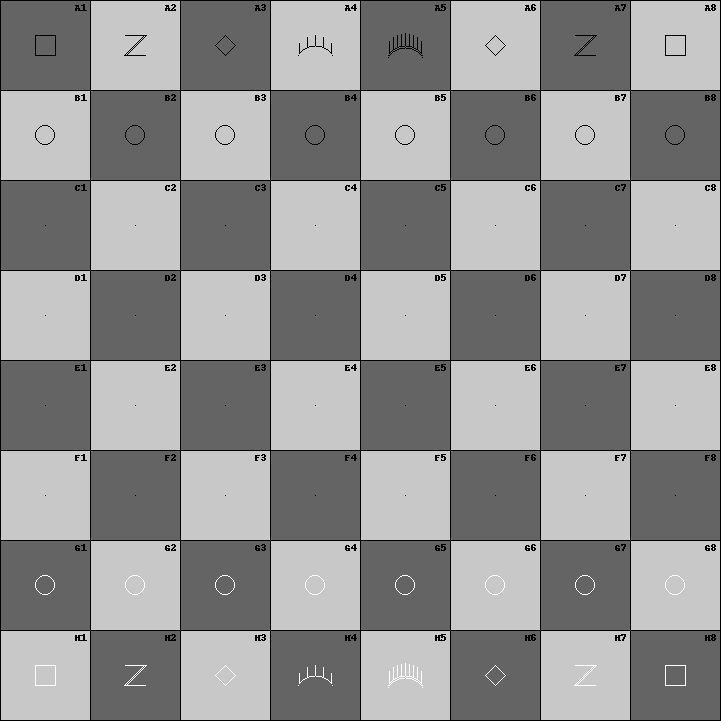

Please type in current position. Type 'end' to end the program at any time.
B5
Please type in desired new position.
C5
Black pawn moved to C5


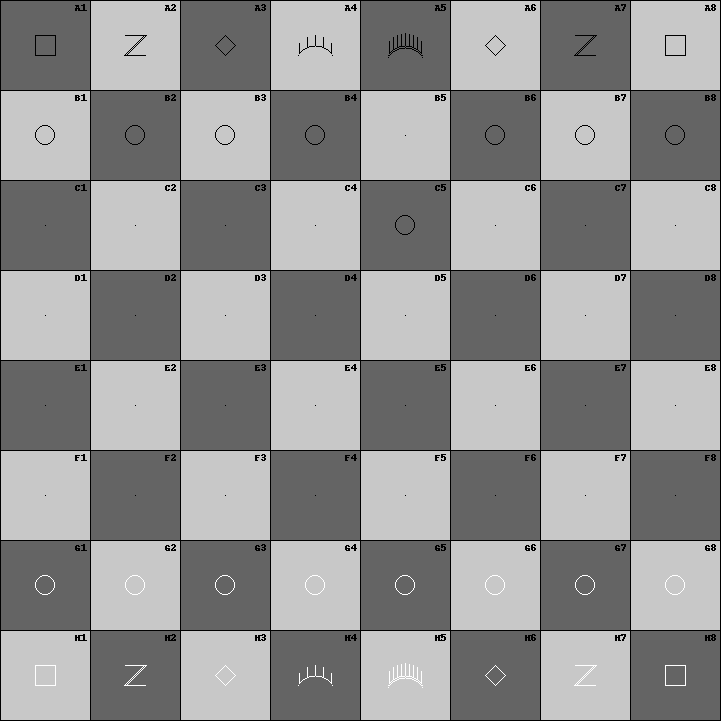

Please type in current position. Type 'end' to end the program at any time.
G2
Please type in desired new position.
F2
White pawn moved to F2


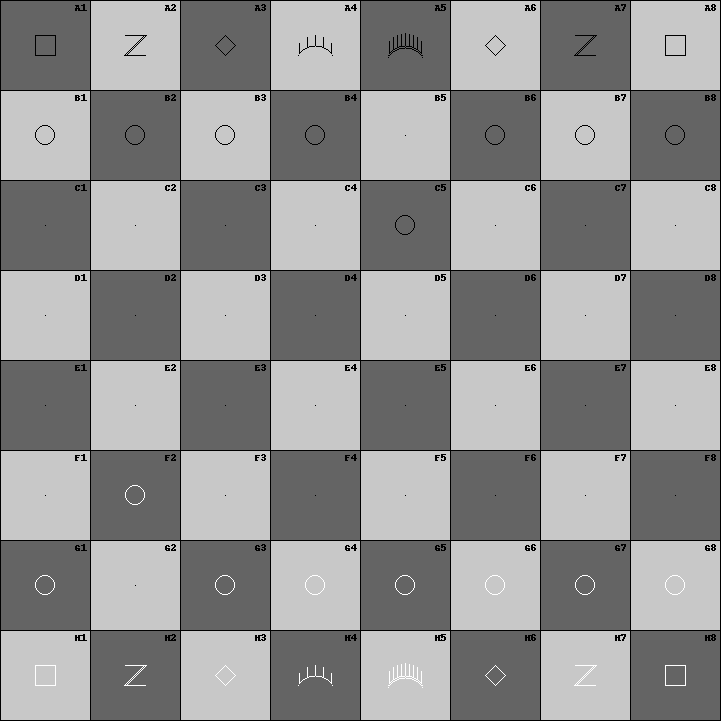

Please type in current position. Type 'end' to end the program at any time.
C5
Please type in desired new position.
D5
Black pawn moved to D5


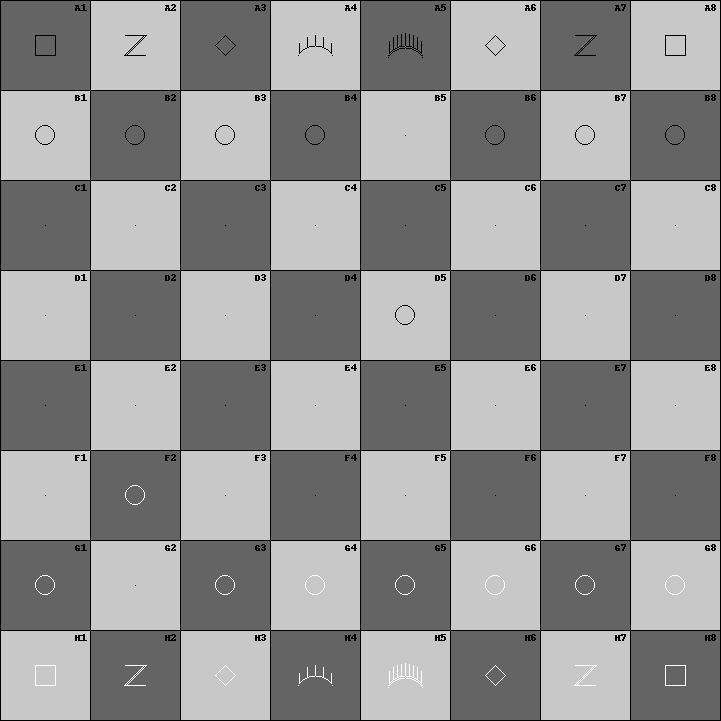

Please type in current position. Type 'end' to end the program at any time.
F2
Please type in desired new position.
E2
White pawn moved to E2


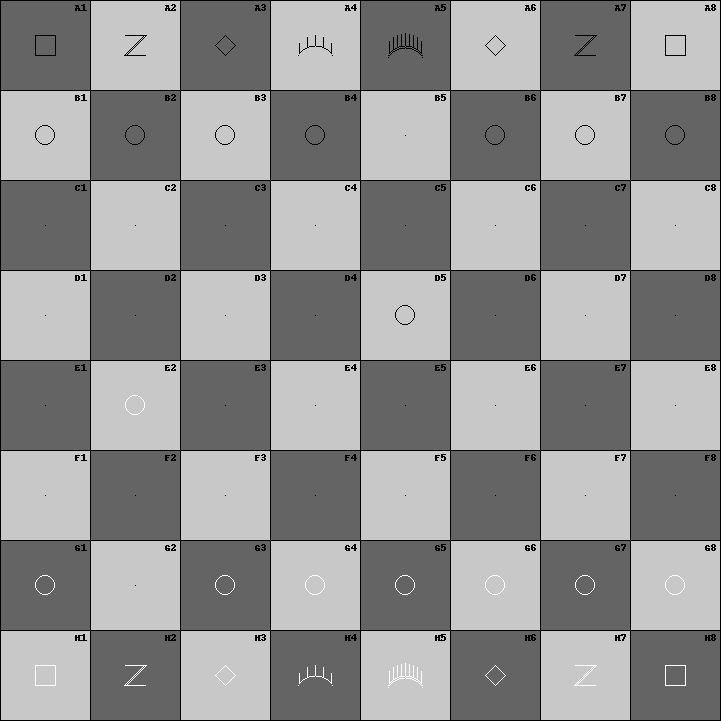

Please type in current position. Type 'end' to end the program at any time.
A2
Please type in desired new position.
C3
Black knight moved to C3


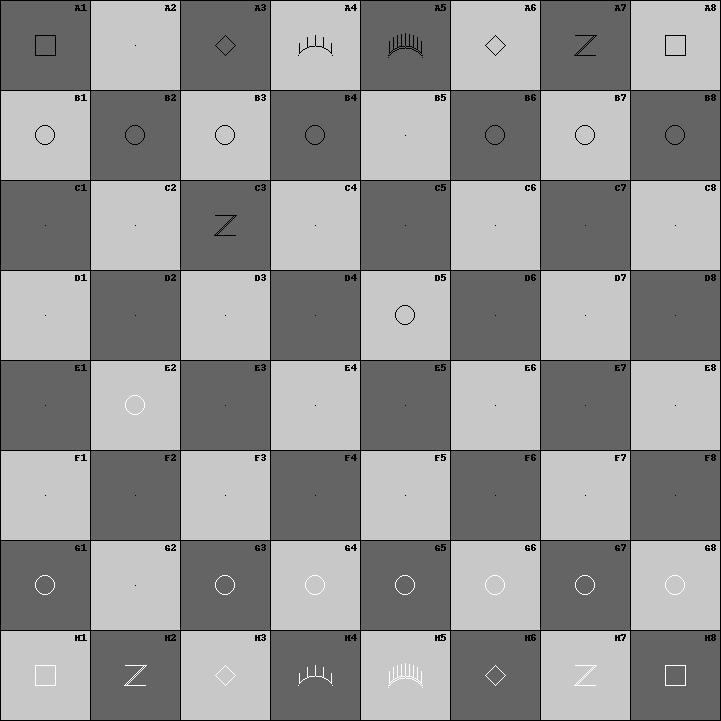

Please type in current position. Type 'end' to end the program at any time.
H2
Please type in desired new position.
F3
White knight moved to F3


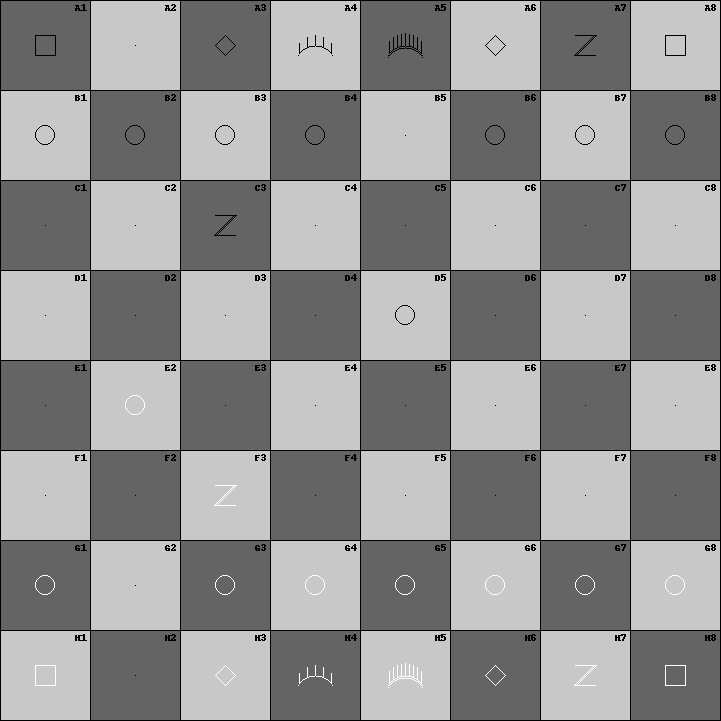

Please type in current position. Type 'end' to end the program at any time.
end
Game ended. No one wins.


In [652]:
print("----------------------------------")
print("Welcome to Chess!")
print("Move your piece by following the prompt below.")

#move_piece("H4", "C4") #use this to move pieces on the board.
positions = resetBoard(positions)

img = Image.fromarray(boardImage(positions))
img = draw_anti_aliasing_pawn(img, positions) #anti-aliasing
img = addPositionText(img)
img.show()

while 6 in positions and 12 in positions:
  first = input("Please type in current position. Type 'end' to end the program at any time.\n")
  if first == "end" or first == "End" or first == "END":
    break;
  second = input("Please type in desired new position.\n")
  if second == "end" or second == "End" or second == "END":
    break;
  move_piece(first, second)
  img = Image.fromarray(boardImage(positions))
  img = draw_anti_aliasing_pawn(img, positions) #anti-aliasing
  img = addPositionText(img)
  img.show()

if 6 in positions and 12 in positions:
  print("Game ended. No one wins.")
elif 6 in positions:
  print("End of game. Black wins!")
elif 12 in positions:
  print("End of game. White wins!")


#display(img)
#img.save('Chess.png')